In [ ]:
# 1. INSTALACIÓN DE LIBRERÍAS
!pip install ultralytics roboflow seaborn pandas matplotlib

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
from roboflow import Roboflow

# 2. DESCARGA DEL DATASET (Tu código)
rf = Roboflow(api_key="XplOBDJ1IF4HWUNi3L3q")
project = rf.workspace("a-un0tk").project("t2-tmaoh-m4dsc")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 


Extracting Dataset Version Zip to T2-3 in yolov8:: 100%|██████████| 2011/2011 [00:00<00:00, 3302.65it/s]


Iniciando entrenamiento...
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/T2-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

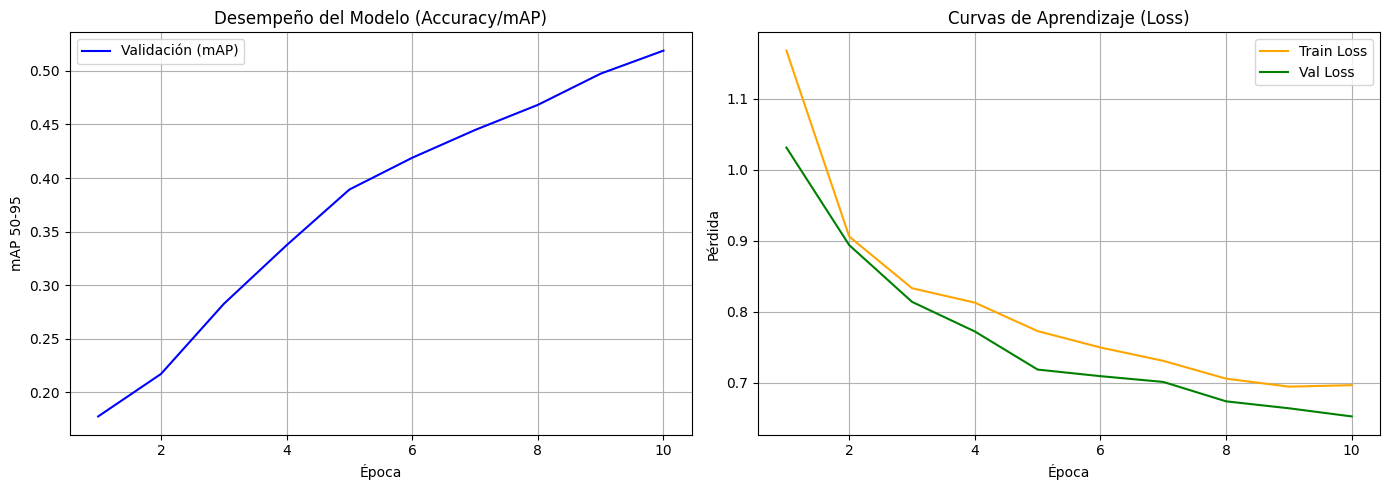

Gráficas de curvas generadas exitosamente.


In [ ]:
# Importa las librerías necesarias al inicio del script
import os
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
# Ten en cuenta que el entorno debe tener 'dataset' definido
# para que la ruta f"{dataset.location}/data.yaml" funcione.

# ===============================
# 3. ENTRENAMIENTO
# ===============================
model = YOLO('yolov8n.pt')
print("Iniciando entrenamiento...")

# NOTA: Asegúrate de que 'dataset' esté definido en tu entorno de Colab/Jupyter.
# Por ejemplo, si usas Roboflow, sería: dataset = rf.workspace.datasets.get(...)
results = model.train(data=f"{dataset.location}/data.yaml", epochs=10, imgsz=640)

# ---------------------------------------------------------
# 4. TUS FUNCIONES PERSONALIZADAS
# ---------------------------------------------------------

def graficar_curvas_academicas(results_csv_path):
    """
    Genera gráficas de Accuracy (usando mAP como proxy) y Loss
    con el estilo de Matplotlib que pidió tu profesor.
    """
    try:
        # Usamos 'results.csv' generado por YOLO
        df = pd.read_csv(results_csv_path)
        df.columns = df.columns.str.strip() # Limpiar espacios en nombres

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Gráfica 1: Precisión (Usando mAP50-95 como "Accuracy")
        axes[0].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='Validación (mAP)', color='blue')
        axes[0].set_title('Desempeño del Modelo (Accuracy/mAP)')
        axes[0].set_xlabel('Época')
        axes[0].set_ylabel('mAP 50-95')
        axes[0].legend()
        axes[0].grid(True)

        # Gráfica 2: Pérdida (Loss)
        axes[1].plot(df['epoch'], df['train/box_loss'], label='Train Loss', color='orange')
        axes[1].plot(df['epoch'], df['val/box_loss'], label='Val Loss', color='green')
        axes[1].set_title('Curvas de Aprendizaje (Loss)')
        axes[1].set_xlabel('Época')
        axes[1].set_ylabel('Pérdida')
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()
        print("Gráficas de curvas generadas exitosamente.")
    except Exception as e:
        print(f"No se pudo generar la gráfica de curvas: {e}")


# ---------------------------------------------------------
# 5. EJECUCIÓN DE LAS GRÁFICAS
# ---------------------------------------------------------

# Buscar automáticamente dónde guardó YOLO el último entrenamiento
detect_dir = 'runs/detect'
# Manejo de error por si no existe la carpeta 'runs/detect'
if not os.path.exists(detect_dir):
    print("Error: No se encontró la carpeta 'runs/detect'. Asegúrate de que el entrenamiento se completó.")
else:
    carpetas = [os.path.join(detect_dir, d) for d in os.listdir(detect_dir) if os.path.isdir(os.path.join(detect_dir, d))]
    # Asegurarse de que haya carpetas antes de buscar la más reciente
    if carpetas:
        ultima_carpeta = max(carpetas, key=os.path.getmtime) # La más reciente
        csv_path = os.path.join(ultima_carpeta, 'results.csv')

        print(f"Leyendo resultados de: {ultima_carpeta}")

        # 1. Graficar Curvas (Loss / Accuracy)
        graficar_curvas_academicas(csv_path)
    else:
        print("No se encontraron resultados de entrenamiento en 'runs/detect'.")

Aplicarle 100 épocas al código con gpu 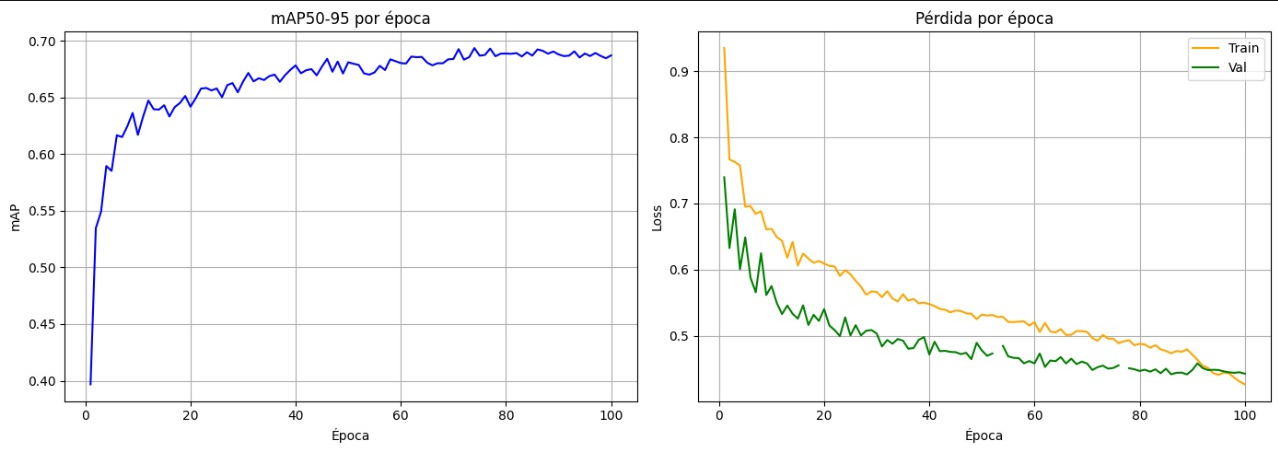

Las gráficas presentan de forma clara la evolución del entrenamiento del modelo durante 100 épocas. En la curva de mAP50-95, se observan un crecimiento rápido en las primeras 20 épocas, lo que evidencia que el modelo aprendió eficientemente las características principales de los vehículos. Posteriormente, alrededor de las 60 - 70 épocas, la métrica entra en una meseta, alcanzando un valor cercano a 0.69, lo que indica convergencia y un rendimiento sólido para detección de objetos.

Por otro lado, las curvas de pérdida (Loss)- tanto de entrenamiento como de validación - muestran una disminución continua y estable, lo cual es el comportamiento espereado en un entrenamiento adecuado. Un aspecto descatable es que la pérdida de validación se mantiene ligeramente por debajo de la entrenamiento durante todo su proceso, lo cual sugiero una buena regularización o un conjunto de validación menos complejo. Ambas pérdidas convergen hacia un valor de 0.45 aproz. alrededor de 80 -90 épocas.

En general, las gráficas reflejan un entrenamiento exitoso, sin indicios de sobreajuste, con buena estabilidad y convergencia. Incluso se podría haber detenido el proceso cerca de la época 70, ya que el rendimiento adicional posterior es mínimo. El modelo final está en condiciones óptimas para continuar con las pruebas en el conjunto de test y evaluar su desempeño real.